In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import optuna 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("/kaggle/input/cancer-data/Cancer_Data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data["Unnamed: 32"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [7]:
data = data.drop("Unnamed: 32", axis="columns")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
t_data = data.copy()
t_data["diagnosis"].replace({"M": 0, "B": 1}, inplace=True)
t_data = t_data.drop(["id"], axis="columns")

/tmp/ipykernel_30/3513207687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  t_data["diagnosis"].replace({"M": 0, "B": 1}, inplace=True)
/tmp/ipykernel_30/3513207687.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  t_data["diagnosis"].replace({"M": 0, "B": 1}, inplace=True)


In [20]:
corr = t_data.corr(method="pearson")
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


([<matplotlib.axis.YTick at 0x7c24e4379480>,
 [Text(0, 0, 'diagnosis'),
  Text(0, 1, 'radius_mean'),
  Text(0, 2, 'texture_mean'),
  Text(0, 3, 'perimeter_mean'),
  Text(0, 4, 'area_mean'),
  Text(0, 5, 'smoothness_mean'),
  Text(0, 6, 'compactness_mean'),
  Text(0, 7, 'concavity_mean'),
  Text(0, 8, 'concave points_mean'),
  Text(0, 9, 'symmetry_mean'),
  Text(0, 10, 'fractal_dimension_mean'),
  Text(0, 11, 'radius_se'),
  Text(0, 12, 'texture_se'),
  Text(0, 13, 'perimeter_se'),
  Text(0, 14, 'area_se'),
  Text(0, 15, 'smoothness_se'),
  Text(0, 16, 'compactness_se'),
  Text(0, 17, 'concavity_se'),
  Text(0, 18, 'concave points_se'),
  Text(0, 19, 'symmetry_se'),
  Text(0, 20, 'fractal_dimension_se'),
  Text(0, 21, 'radius_worst'),
  Text(0, 22, 'texture_worst'),
  Text(0, 23, 'perimeter_worst'),
  Text(0, 24, 'area_worst'),
  Text(0, 25, 'smoothness_worst'),
  Text(0, 26, 'compactness_worst'),
  Text(0, 27, 'concavity_worst'),
  Text(0, 28, 'concave points_worst'),
  Text(0, 29, 'sy

<Figure size 600x600 with 0 Axes>

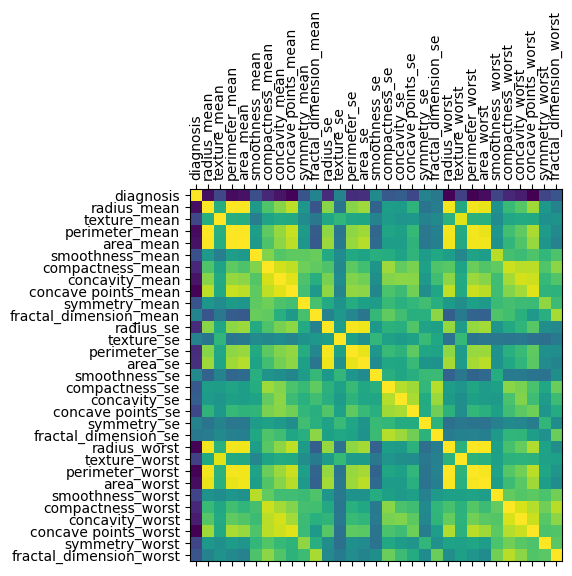

In [22]:
plt.figure(figsize=(6, 6))
plt.matshow(corr)
plt.xticks(range(len(t_data.columns)), t_data.columns, rotation=90)  
plt.yticks(range(len(t_data.columns)), t_data.columns)

In [27]:
t_data["radius_mean"].mean(), t_data["radius_mean"].min(), t_data["radius_mean"].max()

(14.127291739894552, 6.981, 28.11)

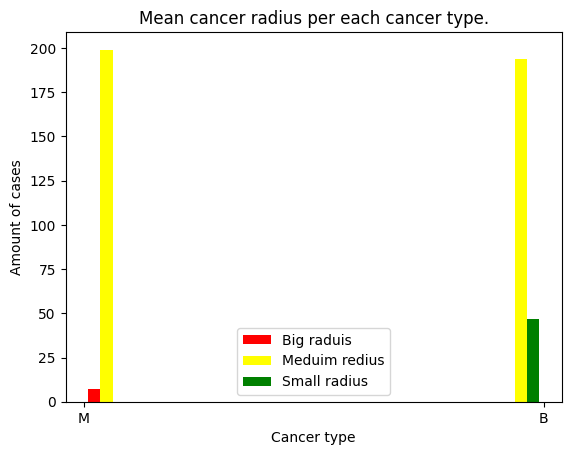

In [36]:
big = data[data["radius_mean"] >= 24]["diagnosis"]
medium = data[(data["radius_mean"] < 24) & (data["radius_mean"] >= 12)]["diagnosis"]
smaller = data[data["radius_mean"] < 10]["diagnosis"]

plt.title("Mean cancer radius per each cancer type.")
plt.ylabel("Amount of cases")
plt.xlabel("Cancer type")
plt.hist([big, medium, smaller], color = ["red", "yellow", "green"], label=["Big raduis", "Meduim redius", "Small radius"])
plt.legend()

In [37]:
t_data["texture_mean"].mean(), t_data["texture_mean"].min(), t_data["texture_mean"].max()

(19.289648506151142, 9.71, 39.28)

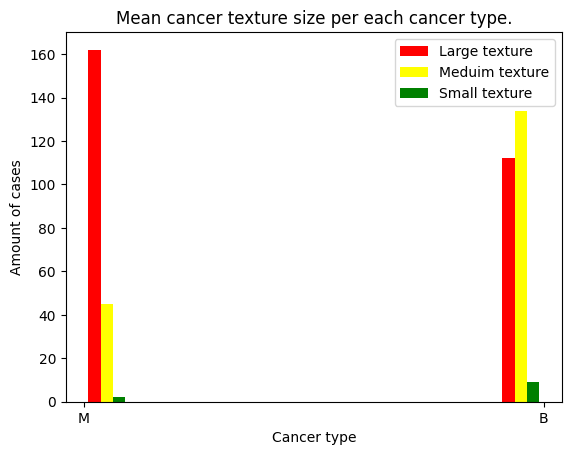

In [40]:
large = data[(data["texture_mean"] <= 39) & (data["texture_mean"] > 19)]["diagnosis"]
medium = data[(data["texture_mean"] <= 19) & (data["radius_mean"] > 12)]["diagnosis"]
smaller = data[data["texture_mean"] < 12]["diagnosis"]

plt.title("Mean cancer texture size per each cancer type.")
plt.ylabel("Amount of cases")
plt.xlabel("Cancer type")
plt.hist([large, medium, smaller], color = ["red", "yellow", "green"], label=["Large texture", "Meduim texture", "Small texture"])
plt.legend()

In [42]:
data["diagnosis"].replace({"M": 0, "B": 1}, inplace=True)

/tmp/ipykernel_30/334107467.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["diagnosis"].replace({"M": 0, "B": 1}, inplace=True)
/tmp/ipykernel_30/334107467.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnosis"].replace({"M": 0, "B": 1}, inplace=True)


In [64]:
def optimization(trial):
    x = data.drop(["id", "diagnosis"], axis="columns")
    y = data["diagnosis"]
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model_name = trial.suggest_categorical("model_name", ["RandomForestClassifier", "LogisticRegression", "SVC", "KNeighborsClassifier"])
    
    if model_name == "RandomForestClassifier":
        
        n_estimators = trial.suggest_int('n_estimators', 10, 100)
        max_depth = trial.suggest_int('max_depth', 1, 32)
        min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)


        clf = RandomForestClassifier(
            n_estimators=n_estimators, 
            max_depth=max_depth, 
            min_samples_split=min_samples_split
        )
    
    elif model_name == "LogisticRegression":
        
        penalty = trial.suggest_categorical("penalty", ["l2", "none"])
#         solver = "lbfgs" if penalty != "l1" else "saga"
        max_iter = trial.suggest_int("max_iter", 30, 100)
        n_jobs = trial.suggest_int("n_jobs", 1, 4)
    
        clf = LogisticRegression(
            penalty = penalty,
            solver = "lbfgs",
            max_iter = max_iter,
            n_jobs = n_jobs
        )
    
    elif model_name == "SVC":
        
        C = trial.suggest_float("C", 1e-1, 10.0)
        kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
        probability = trial.suggest_categorical("probability", [True, False])
        
        
        clf = SVC(
            C = C,
            kernel = kernel,
            probability = probability    
        )
    
    
    elif model_name == "KNeighborsClassifier":
        
        n_neighbors = trial.suggest_int("n_neighbors", 3, 9)
        weights = trial.suggest_categorical("weights", ["uniform", "distance"])
        n_jobs = trial.suggest_int("n_jobs", 1, 5)
        algorithm = trial.suggest_categorical("algorithm", ["ball_tree", "kd_tree", "brute"])
        
        clf = KNeighborsClassifier(
            n_neighbors=n_neighbors,
            weights=weights,
            n_jobs=n_jobs,
            algorithm=algorithm)
        
              
      
        
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()), 
        ('classifier', clf)
    ])
    
    pipeline.fit(x_train, y_train)
    y_preds = pipeline.predict(x_test)
    accuracy = accuracy_score(y_test, y_preds)
    
    return accuracy
        
    

In [65]:
study = optuna.create_study(direction="maximize")
study.optimize(optimization, n_trials=40)

[I 2024-10-08 11:28:43,490] A new study created in memory with name: no-name-b5128379-72a4-4c07-ba0f-6005003b53f3
[I 2024-10-08 11:28:43,528] Trial 0 finished with value: 0.9824561403508771 and parameters: {'model_name': 'SVC', 'C': 5.11792637788778, 'kernel': 'rbf', 'probability': True}. Best is trial 0 with value: 0.9824561403508771.
[I 2024-10-08 11:28:43,570] Trial 1 finished with value: 0.9649122807017544 and parameters: {'model_name': 'KNeighborsClassifier', 'n_neighbors': 6, 'weights': 'distance', 'n_jobs': 5, 'algorithm': 'ball_tree'}. Best is trial 0 with value: 0.9824561403508771.
[I 2024-10-08 11:28:43,603] Trial 2 finished with value: 0.9649122807017544 and parameters: {'model_name': 'KNeighborsClassifier', 'n_neighbors': 7, 'weights': 'distance', 'n_jobs': 2, 'algorithm': 'kd_tree'}. Best is trial 0 with value: 0.9824561403508771.
[I 2024-10-08 11:28:43,633] Trial 3 finished with value: 0.9649122807017544 and parameters: {'model_name': 'KNeighborsClassifier', 'n_neighbors'

In [66]:
print("Best trial:")
trial = study.best_trial
print(f"Accuracy: {trial.value}")
print(f"Best hyperparameters: {trial.params}")

Best trial:
Accuracy: 0.9824561403508771
Best hyperparameters: {'model_name': 'SVC', 'C': 5.11792637788778, 'kernel': 'rbf', 'probability': True}


In [68]:
best_params = study.best_trial.params
best_params

{'model_name': 'SVC',
 'C': 5.11792637788778,
 'kernel': 'rbf',
 'probability': True}

In [70]:
x = data.drop(["id", "diagnosis"], axis="columns")
y = data["diagnosis"]
    
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    

In [75]:
model = SVC(C=best_params["C"], 
            kernel=best_params["kernel"],
            probability=best_params["probability"])

pipeline = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("model", model)            
])



pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', SVC(C=5.11792637788778, probability=True))])

In [80]:
y_preds = pipeline.predict(x_test)


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

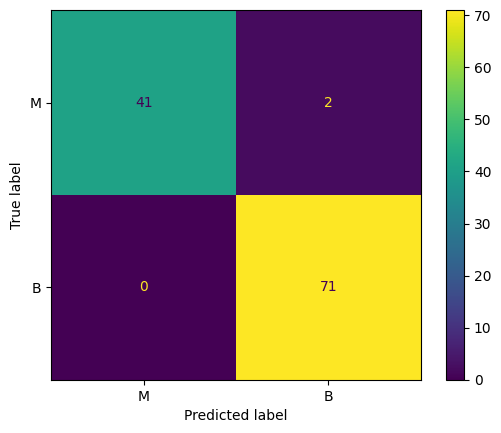

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds, display_labels=["M", "B"])

In [85]:
pipeline.score(x_test, y_test)

0.9824561403508771

In [87]:
x_test.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875


In [108]:
data["fractal_dimension_worst"][0]

0.1189

In [110]:
len(x_test.columns)

30

In [112]:
test_data = [12.21, 12.13, 81.31, 353.34, 0.0392, 0.2, 0.09, 0.02, 0.18, 0.06, 1.02, 0.92, 8.32, 
             152.2, 0.0013, 0.03, 0.043, 0.013, 0.02009, 0.0024, 24.43, 16.93, 182.21, 2024, 0.14, 
             0.663, 0.383, 0.32, 0.39, 0.12]

test_data = np.array([test_data])

len(test_data)

1

In [116]:
cancers = ["M", "B"]
res = pipeline.predict(test_data)
cancers[int(res)]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/tmp/ipykernel_30/2569359463.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cancers[int(res)]


'M'